In [1]:
import numpy as np
import pandas as pd
import pyreadstat
import re

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

This study used data collected in the 2020 Rwanda Demographic and Health Survey. DHS Survey are standardized and this data cleaning can be duplicated accros many countries. 

The data can be requested and accessed here: https://dhsprogram.com/data/available-datasets.cfm


In [2]:
#Reading the dataset. Initially we need pyreadstat library to read SPSS Dataset
df, meta = pyreadstat.read_sav('data.sav')

In [3]:
df.head()

V000  V001  V002  V003  V004       V005  V006    V007    V008    V008A  \
0  RW7   1.0   3.0   2.0   1.0  1463600.0   6.0  2020.0  1446.0  43994.0   
1  RW7   1.0   4.0   1.0   1.0  1463600.0   6.0  2020.0  1446.0  43993.0   
2  RW7   1.0   5.0   2.0   1.0  1463600.0   6.0  2020.0  1446.0  43994.0   
3  RW7   1.0   6.0   3.0   1.0  1463600.0   6.0  2020.0  1446.0  43995.0   
4  RW7   1.0   7.0   2.0   1.0  1463600.0   6.0  2020.0  1446.0  43998.0   

   V009    V010    V011  V012  V013  V014  V015  V016    V017  V018  V019  \
0   6.0  1996.0  1158.0  24.0   2.0   1.0   1.0  12.0  1371.0   5.0  76.0   
1   1.0  1978.0   937.0  42.0   6.0   1.0   1.0  11.0  1371.0   5.0  76.0   
2   5.0  1988.0  1061.0  32.0   4.0   1.0   1.0  12.0  1371.0   5.0  76.0   
3   1.0  1991.0  1093.0  29.0   3.0   1.0   1.0  13.0  1371.0   5.0  76.0   
4   1.0  1984.0  1009.0  36.0   5.0   1.0   1.0  16.0  1371.0   5.0  76.0   

   V019A  V020  V021  V022  V023  V024  V025  V026  V027   V028  V029   V030  \
0    2.0   0.0   1.0   4.0   4.0   1.0   2.0   NaN   1.0  802.0   NaN  800.0   
1    2.0   0.0   1.0   4.0   4.0   1.0   2.0   NaN   1.0  802.0   NaN  800.0   
2    2.0   0.0   1.0   4.0   4.0   1.0   2.0   NaN   1.0  802.0   NaN  800.0   
3    2.0   0.0   1.0   4.0   4.0   1.0   2.0   NaN   1.0  803.0   NaN  800.0   
4    2.0   0.0   1.0   4.0   4.0   1.0   2.0   NaN   1.0  803.0   NaN  800.0   

   V031  V032  V034    V040  V042  V044  V045A  V045B  V045C  V046  V101  \
0   NaN   NaN   NaN  1831.0   1.0   1.0    2.0    2.0    2.0   0.0   1.0   
1   NaN   NaN   NaN  1831.0   1.0   1.0    2.0    2.0    2.0   0.0   1.0   
2   NaN   NaN   1.0  1831.0   1.0   0.0    2.0    2.0    2.0   0.0   1.0   
3   NaN   NaN   NaN  1831.0   1.0   1.0    2.0    2.0    2.0   0.0   1.0   
4   NaN   NaN   1.0  1831.0   1.0   1.0    2.0    2.0    2.0   0.0   1.0   

   V102  V103  V104  V105  V105A  V106  V107  V113  V115  V116  V119  V120  \
0   2.0   NaN  95.0   NaN    NaN   3.0   3.0  14.0  60.0  22.0   1.0   0.0   
1   2.0   NaN  22.0   3.0    1.0   1.0   4.0  14.0  30.0  22.0   1.0   0.0   
2   2.0   NaN   9.0   0.0    1.0   2.0   6.0  14.0  60.0  22.0   1.0   1.0   
3   2.0   NaN  95.0   NaN    NaN   2.0   6.0  14.0  10.0  22.0   1.0   1.0   
4   2.0   NaN   7.0   3.0    1.0   2.0   0.0  14.0  60.0  22.0   1.0   0.0   

   V121  V122  V123  V124  V125  V127  V128  V129  V130  V131  V133  V134  \
0   0.0   0.0   0.0   0.0   0.0  34.0  31.0  31.0   1.0   NaN  15.0   NaN   
1   0.0   0.0   0.0   0.0   0.0  11.0  21.0  31.0   2.0   NaN   4.0   NaN   
2   1.0   0.0   1.0   1.0   0.0  34.0  36.0  31.0   1.0   NaN  12.0   NaN   
3   0.0   0.0   0.0   0.0   0.0  11.0  21.0  31.0   2.0   NaN  12.0   NaN   
4   0.0   0.0   0.0   0.0   0.0  11.0  36.0  31.0   1.0   NaN   6.0   NaN   

   V135  V136  V137  V138  V139  V140  V141  V149  V150  V151  V152  V153  \
0   1.0   5.0   0.0   1.0   1.0   2.0   NaN   5.0   3.0   2.0  58.0   0.0   
1   1.0   1.0   0.0   1.0   1.0   2.0   NaN   1.0   1.0   2.0  42.0   0.0   
2   1.0   4.0   1.0   1.0   1.0   2.0   NaN   4.0   2.0   1.0  34.0   0.0   
3   1.0   4.0   0.0   1.0   1.0   2.0   NaN   4.0   3.0   2.0  68.0   0.0   
4   1.0   5.0   1.0   1.0   1.0   2.0   NaN   3.0   2.0   1.0  47.0   0.0   

   AWFACTT  AWFACTU  AWFACTR  AWFACTE  AWFACTW  V155  V156  V157  V158  V159  \
0    100.0    100.0    100.0    100.0    100.0   2.0   NaN   0.0   0.0   0.0   
1    100.0    100.0    100.0    100.0    100.0   2.0   NaN   0.0   0.0   0.0   
2    100.0    100.0    100.0    100.0    100.0   2.0   NaN   0.0   2.0   2.0   
3    100.0    100.0    100.0    100.0    100.0   2.0   NaN   0.0   2.0   0.0   
4    100.0    100.0    100.0    100.0    100.0   2.0   NaN   0.0   2.0   0.0   

   V160  V161  V166  V167  V168  V169A  V169B  V170  V171A  V171B  V190  \
0   0.0   9.0   NaN   1.0   0.0    1.0    1.0   1.0    1.0    3.0   4.0   
1   0.0   9.0   NaN   0.0   NaN    0.0    NaN   0.0    0.0    0.0   3.0   
2   0.0   8.0   NaN   1.0   0.0    1.0    1

In [7]:
#Mapping variables of interest
variables = ['V001', 'V002','V005', 'V012', 'V013', 'V021', 'V022', 'V023', 'V024', 'V025', 'V106', 'V119', 'V120', 'V130', 'V133',
 'V136', 'V137', 'V150', 'V155', 'V157', 'V158', 'V159', 'V167', 'V169A', 'V170', 'V171A', 'V190', 'V201', 'V206', 'V207', 'V208',
 'V212', 'V218', 'V228', 'V312', 'V313', 'V326', 'V359', 'V360', 'V361', 'V362', 'V364', 'V367', 'V384A',
 'V384B', 'V384C', 'V384D', 'V393', 'V393A', 'V394', 'V395', 'V3A02', 'V3A03', 'V3A04', 'V3A05',
 'V3A06', 'V3A07', 'M17$1', 'V437', 'V438', 'V452A', 'V467B', 'V467C', 'V467D', 'V467F', 'V481', 'V481A', 'V481B', 'V481C',
 'V481D', 'V481E', 'V501', 'V503', 'V511', 'V525', 'V536', 'V602', 'V605', 'V613', 'V621', 'V627', 'V628', 'V632', 'V632A',
 'V701', 'V705', 'V714', 'V717', 'V730', 'V743A', 'V743B', 'V744A', 'V744B', 'V744C', 'V744D', 'V744E', 'V745A', 'V745B',
 'V746', 'V766B', 'V791A', 'MMC1', 'V453']

In [8]:
#Names of variables of interest
names = ['Cluster number', "Household number",
 "Women's individual sample weight (6 decimals)",
 "Respondent's current age",
 'Age in 5-year groups',
 'Primary sampling unit',
 'Sample strata for sampling errors',
 'Stratification used in sample design',
 'Region',
 'Type of place of residence',
 'Highest educational level',
 'Household has: electricity',
 'Household has: radio',
 'Religion',
 'Education in single years',
 'Number of household members (listed)',
 'Number of children 5 and under in household (de jure)',
 'Relationship to household head',
 'Literacy',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to radio',
 'Frequency of watching television',
 'Number of trips in last 12 months',
 'Owns a mobile telephone',
 'Has an account in a bank or other financial institution',
 'Use of internet',
 'Wealth index combined',
 'Total children ever born',
 'Sons who have died',
 'Daughters who have died',
 'Births in last five years',
 'Age of respondent at 1st birth',
 'Number of living children',
 'Ever had a terminated pregnancy',
 'Current contraceptive method',
 'Current use by method type',
 'Last source for current users',
 'Last method discontinued in last 5 years',
 'Reason of last discontinuation',
 'Pattern of use',
 'Intention to use',
 'Contraceptive use and intention',
 'Wanted last child',
 'Heard family planning on radio last few months',
 'Heard family planning on TV last few months',
 'Heard family planning in newspaper/magazine last few months',
 'Heard family planning by text messages on mobile phone',
 'Visited by fieldworker in last 12 months',
 'Did fieldworker talk about family planning',
 'Visited health facility last 12 months',
 'At health facility, told of family planning',
 'Told about side effects',
 'Told about side effects by health or family planning worker',
 'Told how to deal with side effects',
 'Told about other family planning methods',
 'Told about other family planning methods by health or family planning worker',
 'First source for current method',
 'Delivery by caesarean section',
 "Respondent's weight in kilograms (1 decimal)",
 "Respondent's height in centimeters (1 decimal)",
 'Under age 18 (from household questionnaire)',
 'Getting medical help for self: getting permission to go',
 'Getting medical help for self: getting money needed for treatment',
 'Getting medical help for self: distance to health facility',
 'Getting medical help for self: not wanting to go alone',
 'Covered by health insurance',
 'Health insurance type: mutual/community organization',
 'Health insurance type: provided by employer',
 'Health insurance type: social security/ RSSB/RAMA',
 'Health insurance type: private/commercially purchased',
 'Health insurance type: MMI',
 'Current marital status',
 'Number of unions',
 'Age at first cohabitation',
 'Age at first sex',
 'Recent sexual activity',
 'Fertility preference',
 'Desire for more children',
 'Ideal number of children',
 "Husband's desire for children",
 'Ideal number of boys',
 'Ideal number of girls',
 'Decision maker for using contraception',
 'Decision maker for not using contraception',
 "Husband/partner's education level",
 "Husband/partner's occupation (grouped)",
 'Respondent currently working',
 "Respondent's occupation (grouped)",
 "Husband/partner's age",
 "Person who usually decides on: respondent's health care",
 'Person who usually decides on: large household purchases',
 'Beating justified if wife goes out without telling husband',
 'Beating justified if wife neglects the children',
 'Beating justified if wife argues with husband',
 'Beating justified if wife refuses to have sex with husband',
 'Beating justified if wife burns the food',
 'Owns a house alone or jointly',
 'Owns land alone or jointly',
 'Respondent earns more than husband/partner',
 'Number of sex partners, including spouse, in last 12 months',
 'Last 12 months had sex in return for gifts, cash or other',
 'Number of siblings of respondent', 
'Hemoglobin level']

# Construct new DataFrame with selected variables

In [9]:
dff = df[variables]

# Defining Variable for Calendar

In [10]:
dff['calendar'] = df['VCAL$1']

# Cleaning Variable of Calendar 
With DHS, the calendar is arranged in a way that the first character in each row represents the most
recent point in time, while the 80th character position represents data the begining of the calendar. The following code reverse that order so that the first character represent the begining of the calendar. The last character represent the month where the interview was conducted. Meaning, the recent month.

In [11]:
backward = []
for data in df['VCAL$1']:
    x = data[80:0:-1]
    x = x.strip()
    backward.append(x)

In [12]:
dff['calendar'] = backward

In [13]:
#How the information is visible in original DHS Dataset
df['VCAL$1'][6]

'    NNNNNNNN55BPPPPPPPP9999999999999999999999999999999990BPPPPPPPP00000000000000'

In [14]:
#How the information is visible in original DHS Dataset
dff['calendar'][6]

'00000000000000PPPPPPPPB0999999999999999999999999999999999PPPPPPPPB55NNNNNNNN'

# Filter out Data of women who used stopped contraceptive due to wanting to get pregnant
This study analyze the time it take a woman to get pregnant after stopping a certain contraceptive method. We are going to filter out women who stopped method due to wanting to get pregnant. These women were identified by variable 'V360': 'Reason of last discontinuation'. The response 2: Wanted to become pregnant. 

In [15]:
dff = dff[dff['V360'] == 2]

# Filtering Out Certain Methods of use before discontinuation for Pregnancy
However, in this study, we will only analyze modern hormonal methods:
- Injections
- Pills
- Implants
- IUD

These methods will be identified using variable "V359: Last method discontinued in last 5 years". Here are responses and their official records from DHS Questionnaire

                               1   Pill
                               2   IUD
                               3   Injections
                               4   Diaphragm
                               5   Male condom
                               6   Female sterilization
                               7   Male sterilization
                               8   Periodic abstinence
                               9   Withdrawal
                               10  Other traditional
                               11  Implants/Norplant
                               12  Prolonged abstinence
                               13  Lactational amenorrhea (LAM)
                               14  Female condom
                               15  Foam or jelly
                               16  Emergency contraception
                               17  Other modern method
                               18  Standard days method (SDM)
                               19  Specific method 1
                               20  Specific method 2
                           (m) 99  Missing


In [17]:
dff.head()

,V001,V002,V005,V012,V013,V021,V022,V023,V024,V025,V106,V119,V120,V130,V133,V136,V137,V150,V155,V157,V158,V159,V167,V169A,V170,V171A,V190,V201,V206,V207,V208,V212,V218,V228,V312,V313,V326,V359,V360,V361,V362,V364,V367,V384A,V384B,V384C,V384D,V393,V393A,V394,V395,V3A02,V3A03,V3A04,V3A05,V3A06,V3A07,M17$1,V437,V438,V452A,V467B,V467C,V467D,V467F,V481,V481A,V481B,V481C,V481D,V481E,V501,V503,V511,V525,V536,V602,V605,V613,V621,V627,V628,V632,V632A,V701,V705,V714,V717,V730,V743A,V743B,V744A,V744B,V744C,V744D,V744E,V745A,V745B,V746,V766B,V791A,MMC1,V453,calendar
2,1.0,5.0,1463600.0,32.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,12.0,4.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,0.0,0.0,0.0,23.0,2.0,1.0,2.0,3.0,12.0,1.0,2.0,1.0,NaN,1.0,NaN,1.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,NaN,1.0,0.0,1.0,12.0,NaN,642.0,1621.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,22.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,NaN,2.0,8.0,1.0,5.0,34.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,NaN,4.0,135.0,11110PPPPPPPPB11111111111111111111111111111110...
28,2.0,1.0,494313.0,31.0,4.0,2.0,10.0,10.0,2.0,2.0,1.0,0.0,0.0,1.0,6.0,5.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,21.0,3.0,0.0,11.0,3.0,12.0,3.0,2.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,NaN,1.0,1.0,NaN,12.0,1.0,NaN,NaN,NaN,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,21.0,19.0,1.0,3.0,5.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0,5.0,1.0,5.0,34.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,2.0,NaN,333333333333333333333333333333333333000PPPPPPP...
42,2.0,17.0,494313.0,36.0,5.0,2.0,10.0,10.0,2.0,2.0,1.0,0.0,0.0,1.0,5.0,4.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,24.0,3.0,0.0,11.0,3.0,13.0,1.0,2.0,1.0,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,1.0,NaN,13.0,NaN,662.0,1520.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,19.0,1.0,1.0,1.0,4.0,8.0,2.0,2.0,3.0,NaN,0.0,7.0,1.0,5.0,36.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,NaN,4.0,130.0,00000PPPPPPPPB00000010NNNNNNNNNNNNNNNNNNNNNNNN...
43,2.0,18.0,494313.0,30.0,4.0,2.0,10.0,10.0,2.0,2.0,1.0,0.0,0.0,1.0,6.0,5.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,20.0,3.0,0.0,0.0,0.0,NaN,3.0,2.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,616.0,1574.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,19.0,19.0,2.0,3.0,5.0,3.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,0.0,NaN,9.0,140.0,3330PPPPPPPPB033333333333333333333333333333333...
44,2.0,19.0,494313.0,45.0,7.0,2.0,10.0,10.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,28.0,4.0,1.0,3.0,3.0,13.0,2.0,2.0,1.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,13.0,NaN,595.0,1561.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,26.0,1.0,3.0,5.0,2.0,1.0,1.0,1.0,3.0,NaN,1.0,5.0,1.0,5.0,59.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,4.0,126.0,0000022222222222222222222222222222222222200000...


In [18]:
study_methods = [1,2,3,11, 8, 5, 9, 18, 10, 13]

In [19]:
def label_study_method(row):
    if row in study_methods:
        return 'study method'
    else:
        return('not in study method')

In [20]:
dff['study method'] = dff['V359'].apply(lambda row: label_study_method(row))

In [21]:
dff['study method'].value_counts()

study method    1185
Name: study method, dtype: int64

In [22]:
dff = dff[dff['study method'] == 'study method']

In [23]:
dff.shape

(1185, 105)

In [24]:
#Resetting the index
dff.reset_index(drop=True, inplace=True)

# Extracting Calendar Information

# Extracting the Information from Calendar

This is an important code in this data retrieval. This code loops in calendar. Remember calendar variables contains used contraceptive method or reproductive health events. Here is information of the length of the calendar from official DHS. 

.........................................................................
The length of the calendar was set as January-2014 to Abril, 2020 with a total of 76 rows.  Due to the outbreak of COVID the project stopped for approximately 2 ½  months (April-/June). Due to this situation the calendar’s length has to be changed to dynamic. Basically, for the last two months of the fieldwork, the length is still 76 rows, but the beginning of the calendar moved one month up for each month of field work added. Example, all interviews collected in May 2020, the calendar started in February 2014, all interviews collected in June 2020, the calendar started in March 2014 and all interviews collected in July 2020, the calendar started in April 2014. 
.............................................................................

While looping in calendar variable, the "if" looks for women who used Implanon, injectables, Pills and IUD, followed with one or more months of discontinuation or and pregnancy. 

In [26]:
bag = []
for row in dff['calendar']:
        aa = re.findall('[N|1|2|3|5|8|9|W|L|S]+[0|P]+', row)

        number = len(aa)
        
        if len(aa) > 1:
            selected = aa[number-1]
            bag.append(selected)  
        
        else:
            bag.append(aa)  

In [27]:
all_string = []

for i in bag:
    if type(i) == str:
        all_string.append(i)
    else:
        string = "" 
        for element in i:
            string += element
        all_string.append(string)

## Create variable Methods 

In [29]:
dff['methods'] = all_string

# Validation of Dataset and Check if no Mistakes were made

We created a dictionary with calendar with few manipulation coupled with extracted months of implanon use to compare and check if there are no errors in the code.

In [30]:
checking = dict(zip(dff['calendar'], dff['methods']))

In [31]:
print(checking)

{'11110PPPPPPPPB11111111111111111111111111111110PPPPPPPPT000002222222222222222': '11111111111111111111111111111110PPPPPPPP', '333333333333333333333333333333333333000PPPPPPPPBNNNNNNNNNNNNNNNNNNNNNNNNNNNN': '333333333333333333333333333333333333000PPPPPPPP', '00000PPPPPPPPB00000010NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN': '10', '3330PPPPPPPPB0333333333333333333333333333333333333333333PPPPPPPPB00000000000': '333333333333333333333333333333333333333333PPPPPPPP', '00000222222222222222222222222222222222222000000000000000PPPPPT00033333333333': '222222222222222222222222222222222222000000000000000PPPPP', 'PPPPPB1113333333333333333333333333333333333333333333333333333333333330PPP': '1113333333333333333333333333333333333333333333333333333333333330PPP', '11111111111111111111111111111111111000PPPPPPPPB33333333333333333333333333': '11111111111111111111111111111111111000PPPPPPPP', '33333333333333333333333333333333333333333333333333333333333333330PPPPPPPP': '3333333333333333333333333333333

In [32]:
# To delete Woman on Index 2 with Calendar: 00000PPPPPPPPB00000010NNNNNNNNNNNNNNNNNNNNNNNN. As you can see from this calendar, 
# This woman reported that she stopped using contraceptive method 1 due to wanting to get pregnant. However, after 0ne month, she resumed 
# with another type of contraceptive method.

dff = dff.drop([df.index[2]])

In [33]:
dff.reset_index(drop=True, inplace=True)

In [34]:
dff.methods

0                11111111111111111111111111111110PPPPPPPP
1         333333333333333333333333333333333333000PPPPPPPP
2       333333333333333333333333333333333333333333PPPP...
3       2222222222222222222222222222222222220000000000...
4       1113333333333333333333333333333333333333333333...
                              ...                        
1179                   33333333333333333333333300PPPPPPPP
1180        3333333333333333333333333000000000000PPPPPPPP
1181         333333333333333333333333NNNNNNNNNNNNNNNN00PP
1182    8888888888888888888888888888888888888888888888...
1183    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
Name: methods, Length: 1184, dtype: object

# Now Create Variable "Event"
This variable is intended to inform if the event of interest which is to get pregnant after stopping modern hormonal method happended. While creating this variable, we will utilize variable method. Whenever the variable ends with 0, it means the event of interest didn't happed. hence the woman was right censored. 

In [35]:
event_of_interest = []

for row in dff['methods']:
    if row.endswith('0'):
        event_of_interest.append(0)
    else:
        event_of_interest.append(1)

In [36]:
dff['event'] = event_of_interest

# Create Variable "Method Stopped"

In [37]:
method_stopped = []

for row in dff['methods']:
    if row.startswith('1'):
        method_stopped.append('Pill')
    elif row.startswith('2'):
        method_stopped.append('IUD')
    elif row.startswith('3'):
        method_stopped.append('Injection')
    elif row.startswith('N'):
        method_stopped.append('Implants')
    elif row.startswith('5'):
        method_stopped.append('Condom')
    elif row.startswith('8'):
        method_stopped.append('Periodic abstinence')
    elif row.startswith('9'):
        method_stopped.append('Withdraw')
    elif row.startswith('W'):
        method_stopped.append('Other traditional')
    elif row.startswith('L'):
        method_stopped.append('Lactational amenorrhea')
    else:
        method_stopped.append('Standard day method')

In [38]:
dff['method_stopped'] = method_stopped

In [39]:
dff['method_stopped'].value_counts()

Injection                 559
Pill                      203
Implants                  161
Condom                     61
Periodic abstinence        59
Withdraw                   57
Standard day method        40
IUD                        31
Other traditional           9
Lactational amenorrhea      4
Name: method_stopped, dtype: int64

# Create Variable "Time Method Used"

In [40]:
time_method_used = []

for row in dff['methods']:
    if row.startswith('1'):
        number = row.count('1')
        time_method_used.append(number)
    elif row.startswith('2'):
        number = row.count('2')
        time_method_used.append(number)
    elif row.startswith('3'):
        number = row.count('3')
        time_method_used.append(number)
    elif row.startswith('N'):
        number = row.count('N')
        time_method_used.append(number)
    elif row.startswith('5'):
        number = row.count('5')
        time_method_used.append(number)
    elif row.startswith('8'):
        number = row.count('8')
        time_method_used.append(number)
    elif row.startswith('9'):
        number = row.count('9')
        time_method_used.append(number)
    elif row.startswith('W'):
        number = row.count('W')
        time_method_used.append(number)
    elif row.startswith('L'):
        number = row.count('L')
        time_method_used.append(number)
    else:
        number = row.count('S')
        time_method_used.append(number)

In [41]:
dff['time_method_used'] = time_method_used

<Axes: >

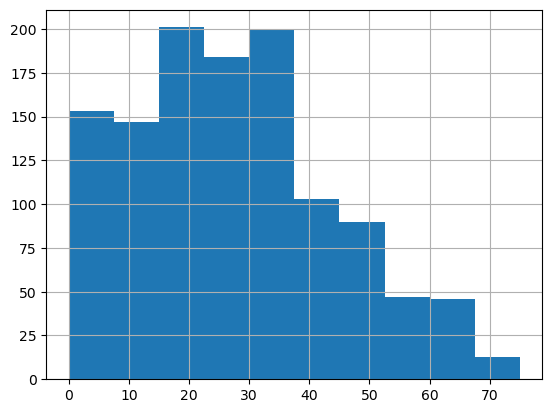

In [42]:
dff['time_method_used'].hist()

# Now Create Variable "Time"
This Variable means Time to Event or Time to censoring. It indicates the total time a woman has used implanon contraceptive method. Either till the time they discontinue the method or till the time of the interview. 

In [43]:
time = []

for row in dff['methods']:
    number = row.count('0')
    time.append((number+1))

In [44]:
dff['time'] = time

<Axes: >

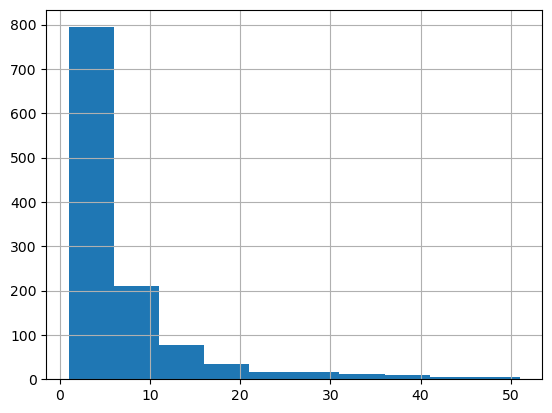

In [45]:
dff['time'].hist()

# Renaming Columns

In [46]:
columns = dict(zip(variables, names))

In [47]:
columns

{'V001': 'Cluster number',
 'V002': 'Household number',
 'V005': "Women's individual sample weight (6 decimals)",
 'V012': "Respondent's current age",
 'V013': 'Age in 5-year groups',
 'V021': 'Primary sampling unit',
 'V022': 'Sample strata for sampling errors',
 'V023': 'Stratification used in sample design',
 'V024': 'Region',
 'V025': 'Type of place of residence',
 'V106': 'Highest educational level',
 'V119': 'Household has: electricity',
 'V120': 'Household has: radio',
 'V130': 'Religion',
 'V133': 'Education in single years',
 'V136': 'Number of household members (listed)',
 'V137': 'Number of children 5 and under in household (de jure)',
 'V150': 'Relationship to household head',
 'V155': 'Literacy',
 'V157': 'Frequency of reading newspaper or magazine',
 'V158': 'Frequency of listening to radio',
 'V159': 'Frequency of watching television',
 'V167': 'Number of trips in last 12 months',
 'V169A': 'Owns a mobile telephone',
 'V170': 'Has an account in a bank or other financial 

In [48]:
dff.rename(columns = columns, inplace=True)

# Creating New Variables
- family planning on media: To be done by combining these variable into an ordinal variable. Heard family planning on radio last few months	Heard family planning on TV last few months	Heard family planning in newspaper/magazine last few months	Heard family planning by text messages on mobile phone.

- Tolerate GBV: To be formed by addition of these variables into an ordinal variable. Beating justified if wife goes out without telling husband	Beating justified if wife neglects the children	Beating justified if wife argues with husband	Beating justified if wife refuses to have sex with husband	Beating justified if wife burns the food

In [49]:
dff['family planning on media'] = dff['Heard family planning on radio last few months'] + dff['Heard family planning on TV last few months'] + dff['Heard family planning in newspaper/magazine last few months'] + dff['Heard family planning by text messages on mobile phone']

In [50]:
dff['Tolerate GBV'] = dff['Beating justified if wife goes out without telling husband'] + dff['Beating justified if wife neglects the children'] + dff['Beating justified if wife argues with husband'] + dff['Beating justified if wife refuses to have sex with husband'] + dff['Beating justified if wife burns the food']

In [51]:
# #Dropping Columns
# dff.drop(columns = ['Heard family planning on radio last few months','Heard family planning on TV last few months','Heard family planning in newspaper/magazine last few months','Heard family planning by text messages on mobile phone', 'Pattern of use',"Respondent's weight in kilograms (1 decimal)", "Respondent's height in centimeters (1 decimal)",
#                     "Under age 18 (from household questionnaire)", 'Beating justified if wife goes out without telling husband','Beating justified if wife neglects the children','Beating justified if wife argues with husband','Beating justified if wife refuses to have sex with husband','Beating justified if wife burns the food'], inplace=True)

In [52]:
dff['Literacy'].value_counts()

2.0    891
0.0    164
1.0    127
4.0      2
Name: Literacy, dtype: int64

In [53]:
# To replace one reponse of 4(blind impaired) to zero (Can't read)
dff['Literacy'].replace({4:0}, inplace=True)

# Handling Categorical Variables

In [54]:
dff['Last source for current users'].replace({11: "Public hospital",
                               12: "Public hospital",
                               14: "Health center",
                                13: "Health center",
                               15:  "Other", 
                               16: "Other",
                               21: "Private clinic", 
                               22:  "Private clinic",
                               23:  "Private clinic",
                               24: "Other",
                               25:  "Private clinic",
                               26: "Private clinic",
                              
                               31: "Other",
                               32: "Other",
                               33: "Other",
                               34: "Other",
                               35: "Other",
                               96: "Other"}, inplace=True
)

In [55]:
dff['Last source for current users'].value_counts()

Health center      452
Other              142
Public hospital     67
Private clinic      21
Name: Last source for current users, dtype: int64

In [56]:
dff['Contraceptive use and intention'].replace({1  :'Using modern method', 
                               2  :'Using traditional method',
                               3  :'Intends to use later', 
                               4  :'Does not intend to use'}, inplace=True)

In [57]:
dff['Contraceptive use and intention'].value_counts()

Using modern method         686
Intends to use later        361
Does not intend to use       78
Using traditional method     59
Name: Contraceptive use and intention, dtype: int64

In [58]:
dff['Wanted last child'].replace({1  :'Wanted then',
                               2  :'Wanted later',
                               3  :'Wanted no more'}, inplace=True)

In [59]:
dff['Wanted last child'].value_counts()

Wanted then       920
Wanted later       74
Wanted no more     32
Name: Wanted last child, dtype: int64

In [60]:
#Delete these variables as they have so many null values
dff.drop(columns = ['Told about side effects by health or family planning worker', 'Told how to deal with side effects', 'Told about other family planning methods', 'Told about other family planning methods by health or family planning worker'], inplace=True)

In [61]:
#Delete these variables as they have so many null values
dff.drop(columns = ['Visited by fieldworker in last 12 months','Did fieldworker talk about family planning'], inplace=True)

In [62]:
# Replace Null values with Zero. SInce these didn't visit any health facility, we assume they didn't get these information
dff['Told about side effects'].replace({np.nan:0}, inplace=True)
dff['At health facility, told of family planning'].replace({np.nan:0}, inplace=True)

In [63]:
# Replace Null values with Zero. SInce these they didn't deliver at all, they didn;t deliver by c/s
dff['Delivery by caesarean section'].replace({np.nan:0}, inplace=True)


In [64]:
#Delete due to small variance in responses
dff.drop(columns = ['Getting medical help for self: not wanting to go alone','Getting medical help for self: getting permission to go'], inplace=True)

In [65]:
dff.rename(columns = {'Getting medical help for self: getting money needed for treatment':'Problem getting money for medical',
       'Getting medical help for self: distance to health facility':"Problem distance to health facility"}, inplace=True)

In [66]:
dff['Problem distance to health facility'].value_counts()

2.0    918
1.0    266
Name: Problem distance to health facility, dtype: int64

In [67]:
dff

,Cluster number,Household number,Women's individual sample weight (6 decimals),Respondent's current age,Age in 5-year groups,Primary sampling unit,Sample strata for sampling errors,Stratification used in sample design,Region,Type of place of residence,Highest educational level,Household has: electricity,Household has: radio,Religion,Education in single years,Number of household members (listed),Number of children 5 and under in household (de jure),Relationship to household head,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Number of trips in last 12 months,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Wealth index combined,Total children ever born,Sons who have died,Daughters who have died,Births in last five years,Age of respondent at 1st birth,Number of living children,Ever had a terminated pregnancy,Current contraceptive method,Current use by method type,Last source for current users,Last method discontinued in last 5 years,Reason of last discontinuation,Pattern of use,Intention to use,Contraceptive use and intention,Wanted last child,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,"At health facility, told of family planning",Told about side effects,First source for current method,Delivery by caesarean section,Respondent's weight in kilograms (1 decimal),Respondent's height in centimeters (1 decimal),Under age 18 (from household questionnaire),Problem getting money for medical,Problem distance to health facility,Covered by health insurance,Health insurance type: mutual/community organization,Health insurance type: provided by employer,Health insurance type: social security/ RSSB/RAMA,Health insurance type: private/commercially purchased,Health insurance type: MMI,Current marital status,Number of unions,Age at first cohabitation,Age at first sex,Recent sexual activity,Fertility preference,Desire for more children,Ideal number of children,Husband's desire for children,Ideal number of boys,Ideal number of girls,Decision maker for using contraception,Decision maker for not using contraception,Husband/partner's education level,Husband/partner's occupation (grouped),Respondent currently working,Respondent's occupation (grouped),Husband/partner's age,Person who usually decides on: respondent's health care,Person who usually decides on: large household purchases,Beating justified if wife goes out without telling husband,Beating justified if wife neglects the children,Beating justified if wife argues with husband,Beating justified if wife refuses to have sex with husband,Beating justified if wife burns the food,Owns a house alone or jointly,Owns land alone or jointly,Respondent earns more than husband/partner,"Number of sex partners, including spouse, in last 12 months","Last 12 months had sex in return for gifts, cash or other",Number of siblings of respondent,Hemoglobin level,calendar,study method,methods,event,method_stopped,time_method_used,time,family planning on media,Tolerate GBV
0,1.0,5.0,1463600.0,32.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,12.0,4.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,0.0,0.0,0.0,23.0,2.0,1.0,2.0,3.0,Public hospital,1.0,2.0,1.0,NaN,Using modern method,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,12.0,0.0,642.0,1621.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,22.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,NaN,2.0,8.0,1.0,5.0,34.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,NaN,4.0,135.0,11110PPPPPPPPB11111111111111111111111111111110...,study method,11111111111111111111111111111110PPPPPPPP,1,Pill,31,2,2.0,0.0
1,2.0,1.0,494313.0,31.0,4.0,2.0,10.0,10.0,2.0,2.0,1.0,0.0,0.0,1.0,6.0,5.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,21.0,3.0,0.0,11.0,3.0,Public hospital,3.0,2.0,1.0,NaN,Using

In [68]:
dff['Problem getting money for medical'].replace({2:0}, inplace=True)
dff['Problem distance to health facility'].replace({2:0}, inplace=True)

In [69]:
#to delete type of insurance since they have almost similar answers. Desire for more children is a repetition of fertility preferances
dff.drop(columns = [
    'Health insurance type: mutual/community organization',
       'Health insurance type: provided by employer',
       'Health insurance type: social security/ RSSB/RAMA',
       'Health insurance type: private/commercially purchased',
       'Health insurance type: MMI','Desire for more children'
], inplace=True)

In [70]:
dff['Current marital status'].replace({0  :'Never in union',
                               1  :'Married/Living with partner',
                               2  :'Married/Living with partner',
                               3  :'Widowed/Divorced/Separated',
                               4  :'Widowed/Divorced/Separated',
                               5  :'Widowed/Divorced/Separated'}, inplace=True)

In [71]:
dff['Recent sexual activity'].replace({2:0, 3:0}, inplace=True)

In [72]:
dff.rename(columns = {'Fertility preference':'Want another baby'}, inplace=True)

In [73]:
dff['Want another baby'].replace({1  :1, 2:0, 3:0,4:0, 5:0}, inplace=True)

In [74]:
# Replace 96 with nan since it is for women who provided non numerical response
dff['Ideal number of children'].replace({96:np.nan}, inplace=True)

In [75]:
dff["Husband's desire for children"].replace({1  :'Both want same', 
                               2  :'Husband wants more',
                               3  :'Husband wants fewer',
                               8: np.nan}, inplace=True)

In [76]:
dff['Decision maker for using contraception'].replace({1  :'Mainly respondent',
                               2  :'Mainly husband, partner',
                               3  :'Joint decision',
                               6: np.nan}, inplace=True)

In [77]:
dff["Husband/partner's occupation (grouped)"].replace({ 0   :'Did not work', 
                               1   :'Professional/clerical/services', 
                               2   :'Professional/clerical/services',
                               5   :'Agricultural',
                               6   :'Others', 
                               7   :'Professional/clerical/services',
                               8   :'Skilled manual', 
                               9   :'Unskilled manual', 
                               98  :"Others"}, inplace=True)

In [78]:
dff["Respondent's occupation (grouped)"].replace({ 0   :'Did not work', 
                               1   :'Professional/clerical/services', 
                               2   :'Professional/clerical/services',
                               5   :'Agricultural',
                               6   :'Others', 
                               7   :'Professional/clerical/services',
                               8   :'Skilled manual', 
                               9   :'Unskilled manual', 
                               98  :"Others"}, inplace=True)

In [79]:
dff["Person who usually decides on: large household purchases"].replace({1  :'Respondent alone', 
                               2  :'Respondent and husband/partner', 
                               3  :'Respondent and other person', 
                               4  :'Husband/partner alone', 
                               5  : np.nan,
                               6 : np.nan}, inplace=True)

In [80]:
dff['Owns a house alone or jointly'].replace({0  :'Does not own', 
                               1  :'Alone only',
                               2  :'Jointly only', 
                               3  :'Both alone and jointly'}, inplace=True)

In [81]:
dff['Owns land alone or jointly'].replace({0  :'Does not own', 
                               1  :'Alone only',
                               2  :'Jointly only', 
                               3  :'Both alone and jointly'}, inplace=True)

In [82]:
dff['Respondent earns more than husband/partner'].replace({
                               1  :'More than him',
                               2  :'Less than him',
                               3  :'About the same',
                               4  :np.nan, 
                               8: np.nan}, inplace=True)

In [83]:
dff['Religion'].replace({
                               1   :'Catholic',
                               2   :'Protestant', 
                               3   :'Adventist', 
                               4   :'Muslim',
                               5   :'Other',
                               8   :'Other', 
                               96  :'Other',
                               97  : 'Other'
}, inplace=True)

# Categorizing Other Methods 

In [84]:
dff['grouped_method_stopped'] = dff['method_stopped'].replace({'Condom':'Barrier & Traditional', 'Periodic abstinence':'Barrier & Traditional',
       'Withdraw':'Barrier & Traditional', 'Standard day method':'Barrier & Traditional', 'Other traditional':'Barrier & Traditional',
       'Lactational amenorrhea':'Barrier & Traditional'})

In [85]:
dff['grouped_method_stopped'].value_counts()

Injection                559
Barrier & Traditional    230
Pill                     203
Implants                 161
IUD                       31
Name: grouped_method_stopped, dtype: int64

In [86]:
dff = dff[dff['Current marital status'] == 'Married/Living with partner']

In [87]:
dff.to_csv('time to pregnancy.csv', index=False)

In [88]:
dff

,Cluster number,Household number,Women's individual sample weight (6 decimals),Respondent's current age,Age in 5-year groups,Primary sampling unit,Sample strata for sampling errors,Stratification used in sample design,Region,Type of place of residence,Highest educational level,Household has: electricity,Household has: radio,Religion,Education in single years,Number of household members (listed),Number of children 5 and under in household (de jure),Relationship to household head,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Number of trips in last 12 months,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Wealth index combined,Total children ever born,Sons who have died,Daughters who have died,Births in last five years,Age of respondent at 1st birth,Number of living children,Ever had a terminated pregnancy,Current contraceptive method,Current use by method type,Last source for current users,Last method discontinued in last 5 years,Reason of last discontinuation,Pattern of use,Intention to use,Contraceptive use and intention,Wanted last child,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,"At health facility, told of family planning",Told about side effects,First source for current method,Delivery by caesarean section,Respondent's weight in kilograms (1 decimal),Respondent's height in centimeters (1 decimal),Under age 18 (from household questionnaire),Problem getting money for medical,Problem distance to health facility,Covered by health insurance,Current marital status,Number of unions,Age at first cohabitation,Age at first sex,Recent sexual activity,Want another baby,Ideal number of children,Husband's desire for children,Ideal number of boys,Ideal number of girls,Decision maker for using contraception,Decision maker for not using contraception,Husband/partner's education level,Husband/partner's occupation (grouped),Respondent currently working,Respondent's occupation (grouped),Husband/partner's age,Person who usually decides on: respondent's health care,Person who usually decides on: large household purchases,Beating justified if wife goes out without telling husband,Beating justified if wife neglects the children,Beating justified if wife argues with husband,Beating justified if wife refuses to have sex with husband,Beating justified if wife burns the food,Owns a house alone or jointly,Owns land alone or jointly,Respondent earns more than husband/partner,"Number of sex partners, including spouse, in last 12 months","Last 12 months had sex in return for gifts, cash or other",Number of siblings of respondent,Hemoglobin level,calendar,study method,methods,event,method_stopped,time_method_used,time,family planning on media,Tolerate GBV,grouped_method_stopped
0,1.0,5.0,1463600.0,32.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,1.0,1.0,Catholic,12.0,4.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,0.0,0.0,0.0,23.0,2.0,1.0,2.0,3.0,Public hospital,1.0,2.0,1.0,NaN,Using modern method,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,12.0,0.0,642.0,1621.0,2.0,0.0,0.0,1.0,Married/Living with partner,1.0,22.0,22.0,1.0,1.0,2.0,Husband wants fewer,1.0,1.0,Joint decision,NaN,2.0,Skilled manual,1.0,Agricultural,34.0,4.0,Husband/partner alone,0.0,0.0,0.0,0.0,0.0,Jointly only,Jointly only,Less than him,1.0,NaN,4.0,135.0,11110PPPPPPPPB11111111111111111111111111111110...,study method,11111111111111111111111111111110PPPPPPPP,1,Pill,31,2,2.0,0.0,Pill
1,2.0,1.0,494313.0,31.0,4.0,2.0,10.0,10.0,2.0,2.0,1.0,0.0,0.0,Catholic,6.0,5.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,21.0,3.0,0.0,11.0,3.0,Public hospital,3.0,2.0,1.0,NaN,Using modern method,Wanted then,0.0,0.0,0.0,0.0,1.0,0.0,1.0,12.0,1.0,NaN,NaN,NaN,1.0,0.0,1.0,Married/Living with partner,1.0,21.0,